In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from meus.printer import *
from datetime import datetime
import matplotlib.pyplot as plt

data = str(datetime.now().year)+'-'+str(datetime.now().month)+'-'+str(datetime.now().day)
data

'2020-4-13'

In [22]:
os.chdir('D:\\OneDrive\\Programação\\python\\covid\\data\\results')
directory = os.listdir('..')
printLis(directory)

-------------
-=< Lista >=-
-------------
0 -> artigo
1 -> caso-full.csv
2 -> cities.csv
3 -> covid19_municipios.csv
4 -> COVID19_REGIOES BR.csv
5 -> Dados_demográficos_municípios.xlsx
6 -> Dados_demográficos_municípios_new.xlsx
7 -> Datalab_COVID.pptx
8 -> figures
9 -> População residente municipal x população faixa etária.csv
10 -> População residente por estado - 2015.csv
11 -> População residente x sexo.csv
12 -> results


In [94]:
date = 1
df_cov =  pd.read_csv('..\\'+directory[date])
df_cov.head()

,city,city_ibge_code,date,estimated_population_2019,is_repeated,is_last,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,place_type,state,new_confirmed,new_deaths
0,São Paulo,3550308.0,2020-02-25,12252023.0,False,False,1,0.00816,2020-02-25,NaN,NaN,city,SP,0,0
1,São Paulo,3550308.0,2020-02-26,12252023.0,True,False,1,0.00816,2020-02-25,NaN,NaN,city,SP,0,0
2,São Paulo,3550308.0,2020-02-27,12252023.0,False,False,1,0.00816,2020-02-27,NaN,NaN,city,SP,0,0
3,São Paulo,3550308.0,2020-02-28,12252023.0,False,False,2,0.01632,2020-02-28,NaN,NaN,city,SP,1,0
4,São Paulo,3550308.0,2020-02-29,12252023.0,False,False,2,0.01632,2020-02-29,NaN,NaN,city,SP,0,0


In [95]:
df_cov = df_cov[(df_cov['date'] == '2020-04-10') & (df_cov['place_type'] == 'city')][[
    "city",
    "estimated_population_2019",
    "last_available_confirmed",
    "last_available_deaths",
    "last_available_confirmed_per_100k_inhabitants",
    "last_available_death_rate",
]]
df_cov = df_cov.rename(columns={
    "city": "Municípios",
    "estimated_population_2019": "Population_COVID",
    "last_available_confirmed": "Confirmed",
    "last_available_deaths": "Deaths",
    "last_available_confirmed_per_100k_inhabitants": "Confirmed/100k",
    "last_available_death_rate": "Death Rate",
})
df_cov.head()

,Municípios,Population_COVID,Confirmed,Deaths,Confirmed/100k,Death Rate
9367,Acrelândia,15256.0,9,0.0,58.99318,NaN
9368,Bujari,10266.0,1,0.0,9.74089,NaN
9369,Plácido de Castro,19761.0,3,0.0,15.18142,NaN
9370,Porto Acre,18504.0,1,0.0,5.40424,NaN
9371,Rio Branco,407319.0,48,2.0,11.78438,0.0417


In [96]:
# df_cities = pd.DataFrame()
# group = df_cov.groupby('city')
# df_cities['Municípios'] = g_population.sum().index
# df_cities['Confirmed'] = group['last_available_confirmed'].sum()
# df_cities['Deaths'] = group.sum()['last_available_deaths']
# df_cities['Confirmed/100k'] = group.sum()['last_available_confirmed_per_100k_inhabitants']
# df_cities.head()

In [97]:
df_cov.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 884 entries, 9367 to 10250
Data columns (total 6 columns):
Municípios          884 non-null object
Population_COVID    869 non-null float64
Confirmed           884 non-null int64
Deaths              882 non-null float64
Confirmed/100k      856 non-null float64
Death Rate          198 non-null float64
dtypes: float64(4), int64(1), object(1)
memory usage: 44.9+ KB


In [98]:
date = 6
df_mun =  pd.read_excel('..\\'+directory[date], skiprows=1, sep='\t')
df_mun.head()

,Municípios,UF,Área Territorial - km² [2018],População estimada - pessoas [2019],Densidade demográfica - hab/km² [2010],IDHM - Índice de desenvolvimento humano municipal [2010]
0,Abaetetuba,PA,1610.65,157698,87.61,0.628
1,Acrelândia,AC,1807.95,15256,6.94,0.604
2,Adamantina,SP,411.987,35068,82.15,0.79
3,Afonso Cláudio,ES,941.188,30586,32.68,0.667
4,Agudos,SP,966.708,37214,35.73,0.745


In [99]:
df_mun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540 entries, 0 to 539
Data columns (total 6 columns):
Municípios                                                   540 non-null object
UF                                                           540 non-null object
Área Territorial - km² [2018]                                540 non-null object
População estimada - pessoas [2019]                          540 non-null object
Densidade demográfica - hab/km² [2010]                       540 non-null object
IDHM - Índice de desenvolvimento humano municipal [2010]    540 non-null object
dtypes: object(6)
memory usage: 12.7+ KB


In [100]:
df_mun = df_mun.rename(columns={
    "População estimada - pessoas [2019]": "Population_Dens",
    "Área Territorial - km² [2018]": "Area",
    "Densidade demográfica - hab/km² [2010]": "Density",
    "IDHM - Índice de desenvolvimento humano municipal [2010]": "MHDI"
})
df_mun['Population_Dens'] = df_mun['Population_Dens'].astype('int64')
df_mun['Area'] = df_mun['Area'].astype('float64')
df_mun['Density'] = df_mun['Density'].astype('float64')
df_mun['MHDI'] = df_mun['MHDI'].astype('float64')
df_mun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540 entries, 0 to 539
Data columns (total 6 columns):
Municípios         540 non-null object
UF                 540 non-null object
Area               540 non-null float64
Population_Dens    540 non-null int64
Density            540 non-null float64
MHDI               540 non-null float64
dtypes: float64(3), int64(1), object(2)
memory usage: 21.2+ KB


In [101]:
df = pd.merge(df_cov, df_mun, on="Municípios")
df['Population_COVID'] = df['Population_COVID'].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 512 entries, 0 to 511
Data columns (total 11 columns):
Municípios          512 non-null object
Population_COVID    512 non-null int64
Confirmed           512 non-null int64
Deaths              512 non-null float64
Confirmed/100k      506 non-null float64
Death Rate          138 non-null float64
UF                  512 non-null object
Area                512 non-null float64
Population_Dens     512 non-null int64
Density             512 non-null float64
MHDI                512 non-null float64
dtypes: float64(6), int64(3), object(2)
memory usage: 44.0+ KB


In [110]:
g = 1
print_campo = 'n'
col1 = 'Confirmed'
col2 = 'MHDI'
try:
    os.mkdir(col2)
    print('Directory created')
except FileExistsError:
    print('Directory already exists')    

Directory already exists


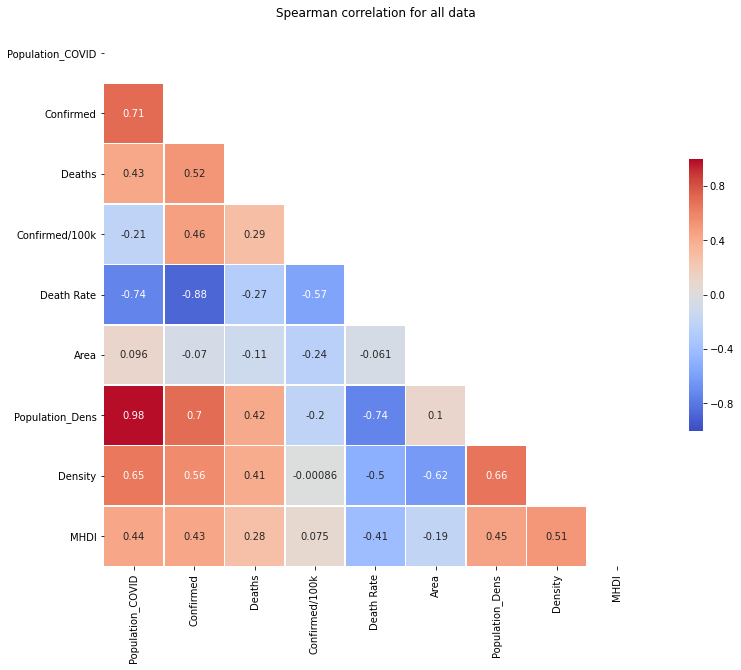

In [111]:
g += 1
corr = df.corr(method='spearman')
mask = np.triu(np.ones_like(corr, dtype=np.bool))
plt.figure(figsize=(15, 10))
sns.heatmap(
    corr,
    annot=True,
    vmin=-1,
    vmax=1,
    cmap='coolwarm',
    center=0,
    square=True,
    linewidths=.5,
    cbar_kws={"shrink": .5},
    mask=mask
)
plt.title('Spearman correlation for all data')
if print_campo == 's':
    plt.savefig(col2+'\\0'+str(g)+'-'+col2+'_'+data+'.png', dpi=150)

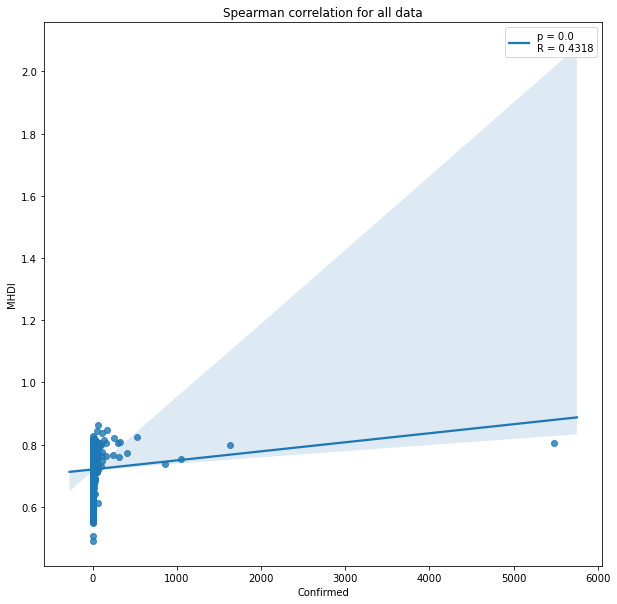

In [114]:
g += 1
df_mold = df
pear_pos = stats.spearmanr(df_mold[col1], df_mold[col2])
plt.figure(figsize=(10, 10))
sns.regplot(
    x=col1,
    y=col2,
    data=df_mold
)
plt.title('Spearman correlation for all data')
plt.legend([
    'p = ' + str(round(pear_pos[1], 4)) + '\nR = ' + str(round(pear_pos[0], 4))
])
if print_campo == 's':
    plt.savefig(col2+'\\0'+str(g)+'-'+col2+'_'+data+'.png', dpi=150)